### Importing Libraries and Loading the Dataset

This cell performs several key tasks:

1. **Library Imports**:
   - `pandas` for data manipulation and analysis.
   - `seaborn` and `matplotlib.pyplot` for data visualization.
   - `statsmodels` for statistical modeling.
   - `sklearn` modules for regression models, preprocessing, and performance metrics.

2. **Dataset Loading**:
   - Reads in the `insurance.csv` file using `pandas.read_csv()` and stores it in a DataFrame called `df`.

3. **Data Cleaning**:
   - Checks for any missing values in the dataset.
   - Removes any duplicate rows to ensure data integrity and prints the new shape of the dataset.


In [482]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_csv("insurance.csv")

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Check duplicates
df.drop_duplicates(inplace=True)
print("Dataset shape after removing duplicates:", df.shape)

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Dataset shape after removing duplicates: (1337, 7)


### Exploratory Data Analysis – Target Variable Distribution

This section begins the exploratory data analysis (EDA) by visualizing the distribution of the target variable:

- **`df['charges']`** refers to the medical charges column, which is the target variable in this dataset.
- A histogram with a KDE (Kernel Density Estimate) curve is plotted to visualize the distribution of medical charges.
- This helps in identifying the shape of the distribution (e.g., skewness, presence of outliers) which is important for model selection and preprocessing.

Note: The `plt.savefig()` line is commented out but could be used to save the plot as an image.


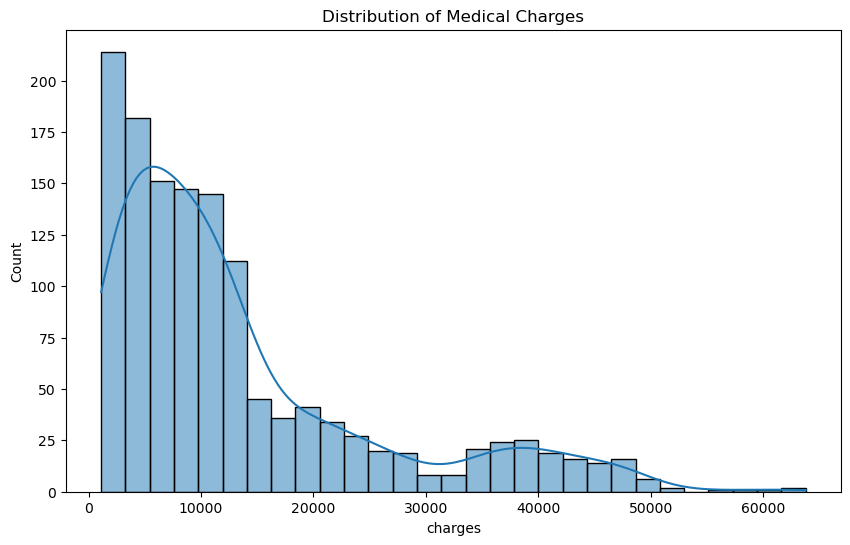

In [485]:
# Exploratory Data Analysis

### 1. Target Variable Distribution
# Distribution of charges (target variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Medical Charges")
plt.show()
#plt.savefig('ChargeDistribution.png') 
#plt.clf() 

### Charges vs. Smoker Status – Boxplot

This visualization explores how medical charges differ between smokers and non-smokers:

- A **boxplot** is used to compare the distribution of charges across the two groups (`smoker` vs `non-smoker`).
- This helps identify:
  - Differences in median charges.
  - The spread of charges.
  - Outliers in each group.
- Smokers typically incur higher medical charges, and this visual makes that contrast clear.

The `plt.savefig()` line is commented out, which would otherwise save the figure to a file.


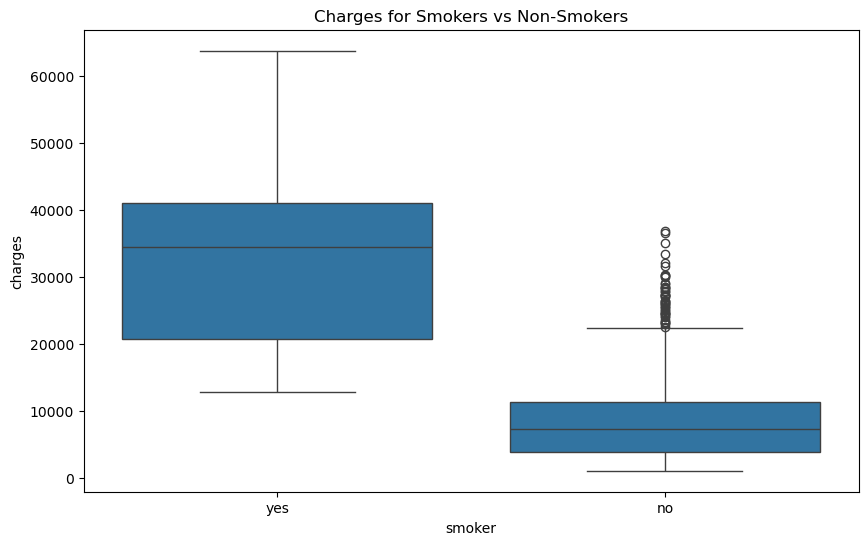

In [488]:
# Boxplot for charges vs smoker
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges for Smokers vs Non-Smokers")
plt.show()
#plt.savefig('ChargeSmokes.png') 
#plt.clf() 

### Medical Charges Across Different Regions – Boxplot

This plot compares the distribution of medical charges across the four regions in the dataset:

- A **boxplot** is used with `region` on the x-axis and `charges` on the y-axis.
- This helps identify:
  - Variability in medical charges between regions.
  - Regions with higher or lower median charges.
  - The presence of outliers within each region.

This kind of regional comparison is useful for understanding geographical trends in healthcare costs.


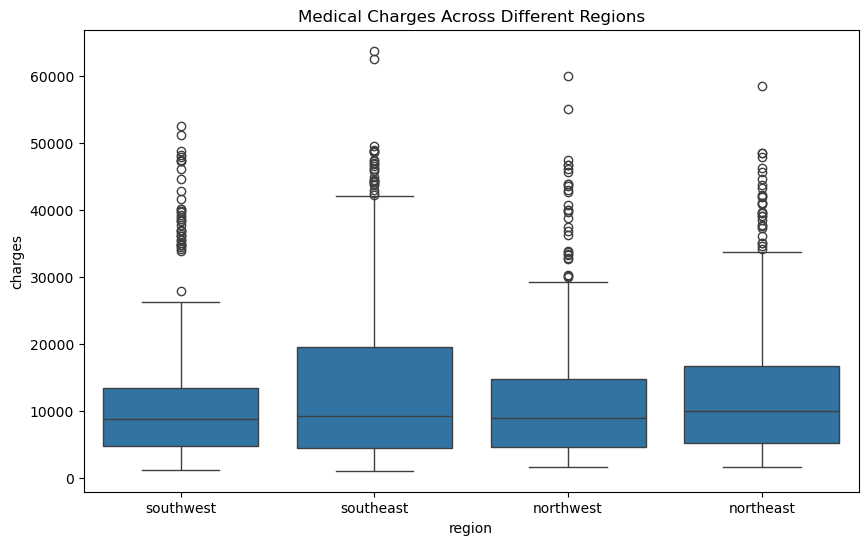

In [491]:
# Charges by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title("Medical Charges Across Different Regions")
plt.show()
#plt.savefig('ChargeRegion.png') 
#plt.clf() 

### Medical Charges by Sex – Boxplot

This visualization explores the distribution of medical charges based on the sex of the individual:

- A **boxplot** is plotted with `sex` on the x-axis and `charges` on the y-axis.
- It helps determine whether there are noticeable differences in healthcare costs between males and females.
- Observations may include:
  - Similar or differing medians.
  - Varying spread and presence of outliers for each group.

This analysis can reveal whether gender plays a role in medical cost variation.


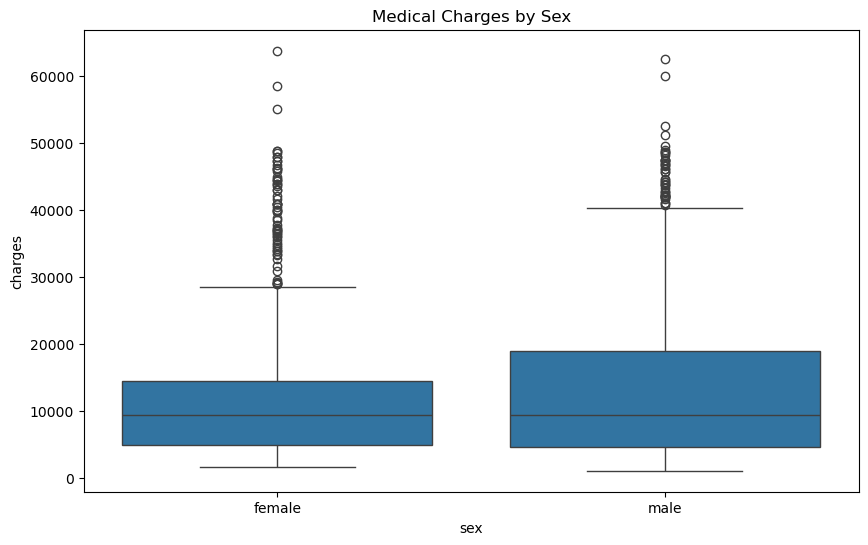

In [494]:
# Charges by sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Medical Charges by Sex")
plt.show()
#plt.savefig('ChargeSex.png') 
#plt.clf() 

### Age vs Medical Charges – Scatter Plot

This visualization explores the relationship between age and medical charges, colored by smoking status:

- A **scatter plot** is created with `age` on the x-axis and `charges` on the y-axis.
- The points are colored by the `smoker` status, distinguishing between smokers and non-smokers.
- This plot helps identify any trends or patterns, such as:
  - Whether older individuals tend to have higher medical charges.
  - If smoking status impacts medical charges across different age groups.

This analysis can highlight how age and smoking interact to influence medical costs.


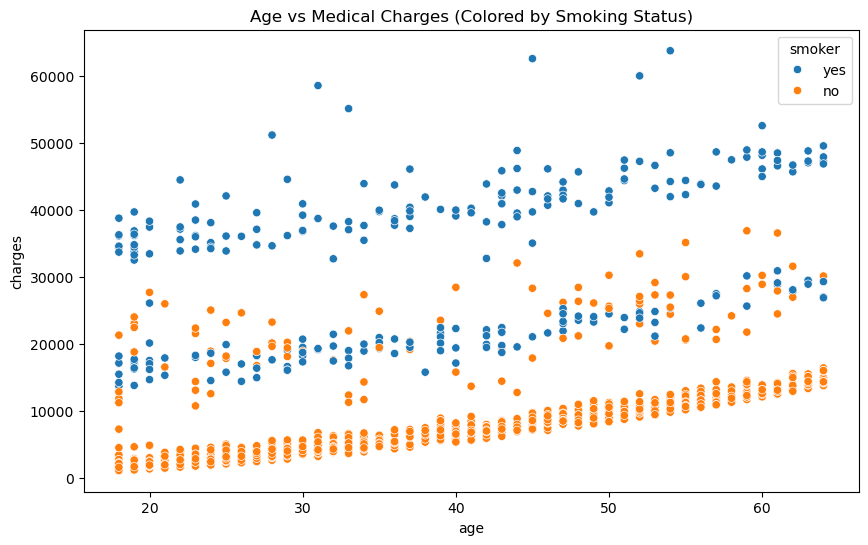

In [497]:
# Age vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Age vs Medical Charges (Colored by Smoking Status)")
plt.show()
#plt.savefig('ChargeAge.png') 
#plt.clf() 

### BMI vs Medical Charges – Scatter Plot

This visualization explores the relationship between BMI (Body Mass Index) and medical charges, colored by smoking status:

- A **scatter plot** is created with `bmi` on the x-axis and `charges` on the y-axis.
- The points are colored by the `smoker` status, distinguishing between smokers and non-smokers.
- This plot helps identify any trends or patterns, such as:
  - Whether individuals with higher BMI tend to have higher medical charges.
  - How smoking status influences the relationship between BMI and medical costs.

This analysis can reveal how BMI and smoking interact to affect medical charges.


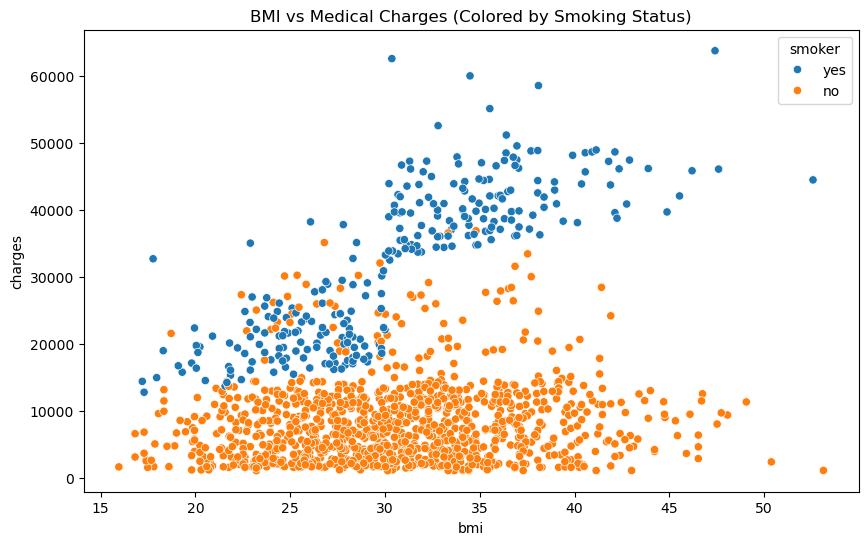

In [500]:
# BMI vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("BMI vs Medical Charges (Colored by Smoking Status)")
plt.show()
#plt.savefig('ChargeBMI.png') 
#plt.clf() 

### Medical Charges by Number of Children – Box Plot

This visualization explores the distribution of medical charges based on the number of children:

- A **box plot** is created with `children` on the x-axis and `charges` on the y-axis.
- This plot helps identify how the number of children influences medical charges.
- Observations may include:
  - Variations in median charges across different numbers of children.
  - Spread of charges and presence of any outliers for each group.

This analysis can reveal whether the number of children plays a role in the variation of medical charges.


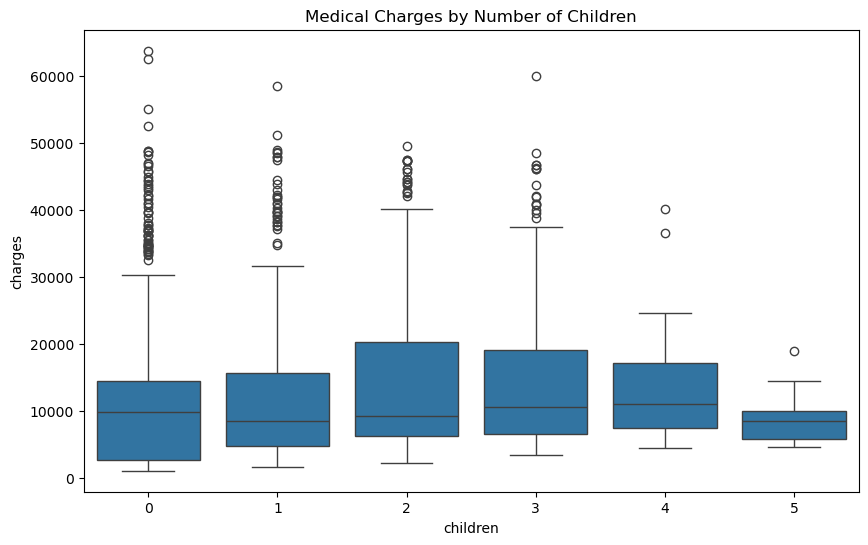

In [503]:
# Children vs Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title("Medical Charges by Number of Children")
plt.show()
#plt.savefig('ChargeChildren.png') 
#plt.clf() 

### Correlation Matrix – Heatmap

This visualization explores the correlation between numerical features in the dataset after converting categorical variables to numerical values:

- **Categorical to Numerical Conversion**:
  - The `smoker` column is converted from `'yes'`/`'no'` to `1`/`0`.
  - The `sex` column is converted from `'male'`/`'female'` to `1`/`0`.

- **Correlation Matrix**:
  - The correlation between numerical features is computed using `df_corr.corr(numeric_only=True)`.
  - A **heatmap** is generated to visualize the correlation matrix, where:
    - The color represents the strength of the correlation, ranging from -1 (negative) to 1 (positive).
    - `annot=True` displays the correlation values in the heatmap.

This analysis helps identify how strongly features are correlated with one another, such as whether smoking status or sex has any strong relationship with medical charges.


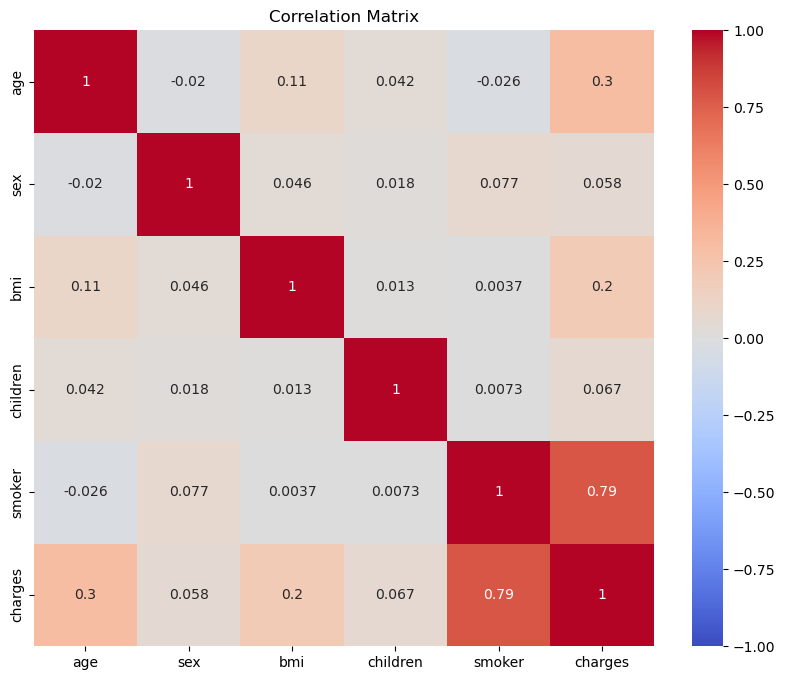

In [506]:
# Convert categorical features to numerical for correlation analysis
df_corr = df.copy()
df_corr['smoker'] = df_corr['smoker'].map({'yes': 1, 'no': 0})
df_corr['sex'] = df_corr['sex'].map({'male': 1, 'female': 0})

# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df_corr.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()
#plt.savefig('CorrelationMatrix.png') 
#plt.clf() 

### Pairplot of Numerical Features with Smoking Status

This visualization explores the pairwise relationships between numerical features, colored by smoking status:

- A **pairplot** is created for the columns `age`, `bmi`, `children`, `charges`, and `smoker`.
- The points are colored by the `smoker` status, using the `'viridis'` palette, which helps differentiate between smokers and non-smokers.
- The plot shows scatter plots for each pair of variables and histograms for the individual variables.

This analysis allows us to:
- Examine how each numerical feature correlates with others.
- Observe if there are distinct patterns in the relationships based on smoking status.

The pairplot helps in understanding how smoking status influences the distribution and relationships of key features.


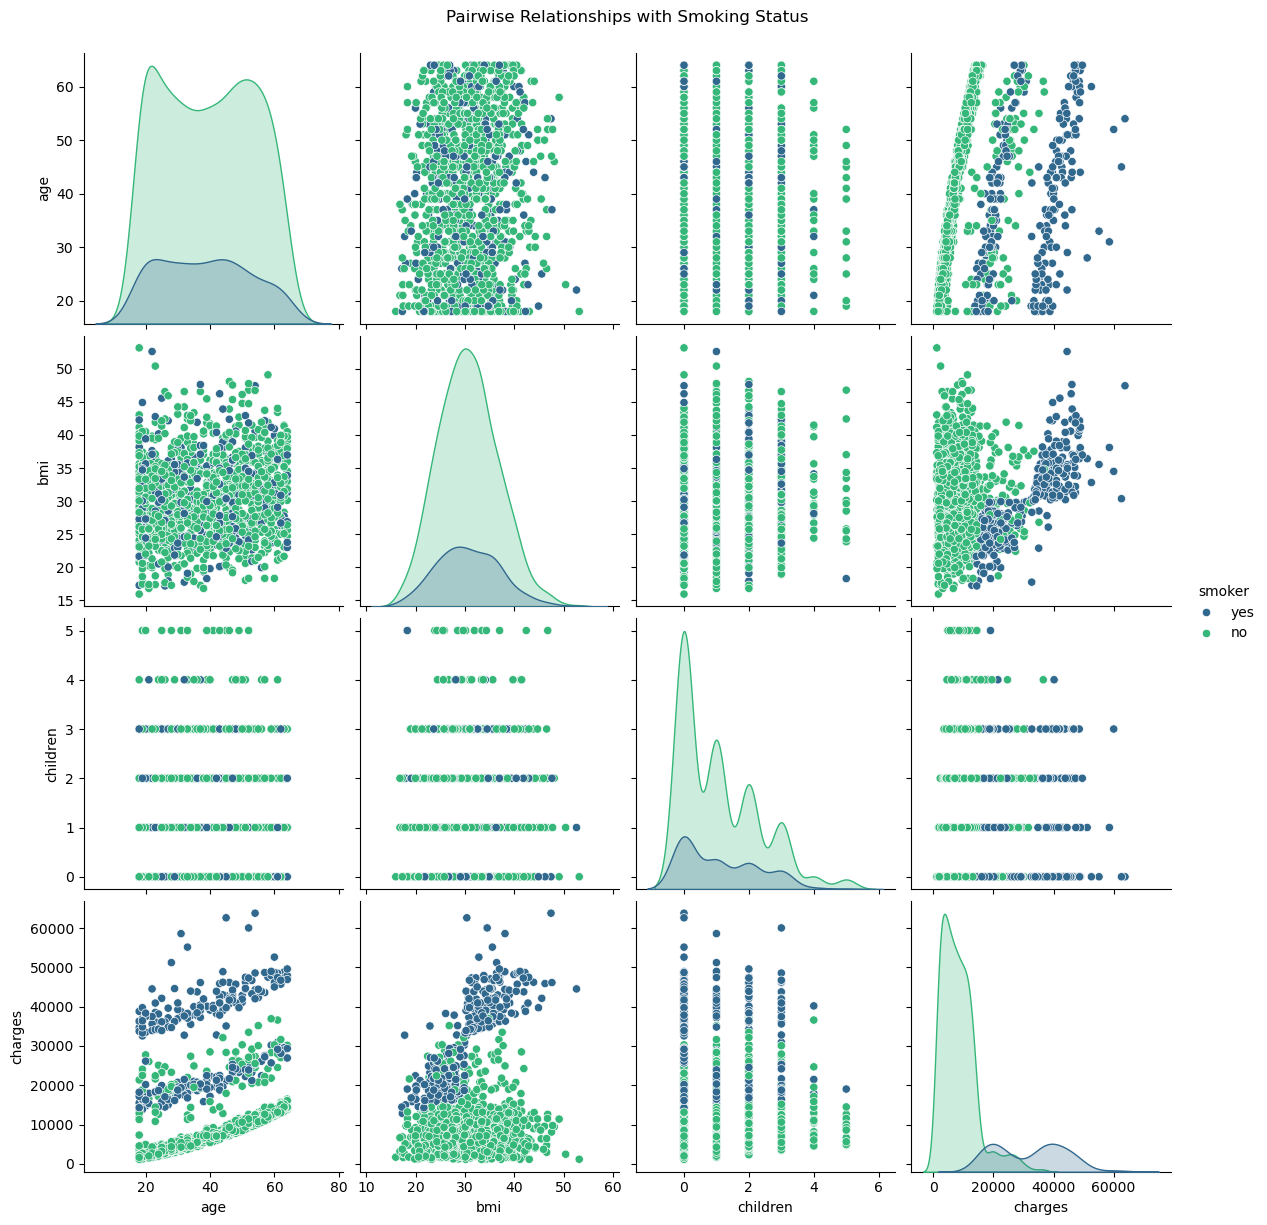

In [509]:
# Pairplot of numerical features with smoking status
sns.pairplot(df[['age', 'bmi', 'children', 'charges', 'smoker']], 
              hue='smoker', palette='viridis', height=3)
plt.suptitle("Pairwise Relationships with Smoking Status", y=1.02)
plt.show()
#plt.savefig('PairwiseRelationships.png') 
#plt.clf() 

### Data Preparation

This cell transforms categorical features into numerical formats suitable for regression analysis:

1. **Convert Binary Categorical Features**:
   - `df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})`
   - `df['sex'] = df['sex'].map({'male': 1, 'female': 0})`

2. **One-Hot Encode 'region' Feature**:
   - `df = pd.get_dummies(df, columns=['region'], drop_first=True)`: Converts the `region` column into multiple binary columns (dummy variables), dropping the first to avoid multicollinearity.

3. **Preview the Transformed Dataset**:
   - `print(df.head())`: Displays the first few rows of the modified DataFrame to verify changes.


In [511]:
# Convert categorical features to numerical
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# One-hot encode 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Verify transformed data
print(df.head())

   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


### Defining Features and Target

This cell defines the features (`X`) and target (`y`) for the regression model and includes an intercept term:

1. **Define Features and Target**:
   - `X = df.drop(columns=['charges'])`: The features are all columns except `charges`.
   - `y = df['charges']`: The target variable is the `charges` column.

2. **Add Constant for Intercept**:
   - `X = sm.add_constant(X)`: Adds an intercept term to the feature matrix, which is required for accurate linear regression.


In [513]:
# Define features (X) and target (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Add constant for intercept term
X = sm.add_constant(X)

### Fitting and Summarizing the OLS Model

This cell fits the OLS regression model and outputs performance metrics:

1. **Fit the OLS Model**:
   - `model = sm.OLS(y.astype(float), X.astype(float)).fit()`: Fits an OLS regression model using the features (`X`) and target (`y`). Data is cast to `float` for compatibility.

2. **Print Model Summary**:
   - `print(model.summary())`: Outputs the full summary of the regression model including coefficients, p-values, R-squared, and more.
     - Focus on **p-values**: values below 0.05 suggest that the corresponding features are statistically significant predictors of `charges`.


In [515]:
# Fit OLS model
model = sm.OLS(y.astype(float), X.astype(float)).fit()
print(model.summary())  # Check p-values (keep if p < 0.05)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:06:44   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    988.227  

### Feature Selection, Data Splitting, and Standardization

This code performs feature selection, splits the data into training and test sets, and standardizes the features for machine learning:

1. **Selecting Significant Features**:
   - `X = df[['age', 'bmi', 'children', 'smoker']]`: The features (`X`) are selected based on their significance (from previous analysis), including `age`, `bmi`, `children`, and `smoker`.
       - `sex` & `region` have `p-values` over 0.005 so they are excluded
   - `y = df['charges']`: The target variable (`y`) is `charges`, which represents the medical charges.

2. **Splitting the Data**:
   - `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`: The data is split into training and test sets:
     - 80% of the data is used for training (`X_train` and `y_train`).
     - 20% is used for testing (`X_test` and `y_test`).
     - `random_state=42` ensures reproducibility of the split.

3. **Standardizing the Features**:
   - `scaler = StandardScaler()`: A `StandardScaler` is initialized to standardize the features.
   - `X_train_scaled = scaler.fit_transform(X_train)`: The training features are standardized (mean = 0, standard deviation = 1).
   - `X_test_scaled = scaler.transform(X_test)`: The test features are standardized using the same parameters as the training data (to ensure consistency).

Standardizing the features ensures that all features contribute equally to the model, especially when using models sensitive to feature scaling.


In [517]:
# Select significant features (based on p-values)
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression Model and Evaluation

This code fits a linear regression model, makes predictions, and evaluates its performance using key metrics:

1. **Fitting the Linear Regression Model**:
   - `lr = LinearRegression()`: Initializes a linear regression model.
   - `lr.fit(X_train_scaled, y_train)`: Fits the model on the scaled training data (`X_train_scaled` for features and `y_train` for the target).

2. **Making Predictions on the Test Set**:
   - `y_pred_lr = lr.predict(X_test_scaled)`: Uses the trained model to predict the target (`charges`) on the scaled test set (`X_test_scaled`).

3. **Evaluating Model Performance**:
   - `r2_score(y_test, y_pred_lr)`: Calculates the **R² (coefficient of determination)**, which measures how well the model explains the variance in the target variable.
   - `mean_absolute_error(y_test, y_pred_lr)`: Computes the **Mean Absolute Error (MAE)**, which represents the average magnitude of errors in predictions without considering their direction.
   - `root_mean_squared_error(y_test, y_pred_lr)`: Computes the **Root Mean Squared Error (RMSE)**, which gives the average error magnitude, expressed in the same units as the target variable (`charges`).

These metrics are important for assessing the accuracy and reliability of the linear regression model.


In [519]:
# ---------------------
# Linear Regression
# ---------------------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation metrics
print(f"R²: {r2_score(y_test, y_pred_lr):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.3f}")
print(f"RMSE: ${root_mean_squared_error(y_test, y_pred_lr):,.2f}")

R²: 0.805
MAE: 4198.593
RMSE: $5,992.88


### Ridge Regression Model and Evaluation

This code fits a Ridge regression model, makes predictions, and compares its performance and coefficients with the linear regression model:

1. **Fitting the Ridge Regression Model**:
   - `ridge = Ridge(alpha=1.0)`: Initializes the Ridge regression model with a regularization parameter (`alpha=1.0`). This controls the strength of the regularization.
   - `ridge.fit(X_train_scaled, y_train)`: Fits the Ridge model on the scaled training data (`X_train_scaled` for features and `y_train` for the target).

2. **Making Predictions with Ridge Regression**:
   - `y_pred_ridge = ridge.predict(X_test_scaled)`: Uses the trained Ridge model to predict the target (`charges`) on the scaled test set (`X_test_scaled`).

3. **Evaluating Ridge Regression Model Performance**:
   - `r2_score(y_test, y_pred_ridge)`: Calculates the **R²** for the Ridge regression model, measuring how well it explains the variance in the target variable.
   - `mean_absolute_error(y_test, y_pred_ridge)`: Computes the **Mean Absolute Error (MAE)**, which shows the average magnitude of errors in the Ridge model's predictions.
   - `root_mean_squared_error(y_test, y_pred_ridge)`: Calculates the **Root Mean Squared Error (RMSE)** for the Ridge model, indicating the average prediction error in the same units as the target variable.

4. **Coefficient Comparison between Linear and Ridge Regression**:
   - The coefficients of both the linear regression (`lr.coef_`) and Ridge regression (`ridge.coef_`) models are printed for comparison. This allows us to observe how regularization (in Ridge) affects the magnitude of the coefficients.

Ridge regression helps reduce overfitting by adding a penalty to the model, which can lead to smaller coefficients compared to ordinary linear regression.


In [521]:
# ---------------------
# Ridge Regression
# ---------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print(f"R²: {r2_score(y_test, y_pred_ridge):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.3f}")
print(f"RMSE: ${root_mean_squared_error(y_test, y_pred_ridge):,.2f}")

# Coefficient comparison
print("\nCoefficient Comparison (Linear vs Ridge):")
print(pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_
}))

R²: 0.804
MAE: 4201.166
RMSE: $5,995.62

Coefficient Comparison (Linear vs Ridge):
    Feature       Linear        Ridge
0       age  3486.695758  3483.291068
1       bmi  1846.565623  1845.079045
2  children   642.426873   642.178650
3    smoker  9220.234600  9211.459180


### Lasso Regression Model and Feature Selection

This code fits a Lasso regression model, evaluates its performance, and shows feature selection results:

1. **Fitting the Lasso Regression Model**:
   - `lasso = Lasso(alpha=0.1)`: Initializes the Lasso regression model with a regularization parameter (`alpha=0.1`). The `alpha` value controls the strength of the penalty.
   - `lasso.fit(X_train_scaled, y_train)`: Fits the Lasso model on the scaled training data (`X_train_scaled` for features and `y_train` for the target).

2. **Making Predictions with Lasso Regression**:
   - `y_pred_lasso = lasso.predict(X_test_scaled)`: Uses the trained Lasso model to predict the target (`charges`) on the scaled test set (`X_test_scaled`).

3. **Evaluating Lasso Regression Model Performance**:
   - `r2_score(y_test, y_pred_lasso)`: Calculates the **R²** for the Lasso regression model, measuring how well it explains the variance in the target variable.
   - `mean_absolute_error(y_test, y_pred_lasso)`: Computes the **Mean Absolute Error (MAE)**, which shows the average magnitude of errors in the Lasso model's predictions.
   - `root_mean_squared_error(y_test, y_pred_lasso)`: Calculates the **Root Mean Squared Error (RMSE)** for the Lasso model, indicating the average prediction error in the same units as the target variable.

4. **Feature Selection with Lasso**:
   - The coefficients of each feature in the Lasso model are printed, along with a boolean indicating whether the feature was selected (`lasso.coef_ != 0`).
   - Features with coefficients equal to 0 are effectively excluded by Lasso regression, making it useful for feature selection.

Lasso regression helps with both regularization and automatic feature selection by shrinking some feature coefficients to zero.


In [523]:
# ---------------------
# 4.3 Lasso Regression
# ---------------------

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print(f"R²: {r2_score(y_test, y_pred_lasso):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso):.3f}")
print(f"RMSE: ${root_mean_squared_error(y_test, y_pred_lasso):,.2f}")

# Feature selection results
print("\nLasso Feature Selection:")
print(pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_,
    'Selected': lasso.coef_ != 0
}))

R²: 0.805
MAE: 4198.600
RMSE: $5,992.91

Lasso Feature Selection:
    Feature  Coefficient  Selected
0       age  3486.613045      True
1       bmi  1846.474141      True
2  children   642.333449      True
3    smoker  9220.131165      True


### Residual Plot for Linear Regression

This visualization analyzes the residuals (errors) from the Linear Regression model:

1. **Creating the Residual Plot**:
   - `sns.residplot(x=y_pred, y=y_test - y_pred_lr, lowess=True, line_kws={'color': 'red'})`: A residual plot is created with the predicted values (`y_pred`) on the x-axis and the residuals (the difference between the true values `y_test` and predicted values `y_pred_lr`) on the y-axis.
     - The `lowess=True` parameter fits a locally weighted scatterplot smoothing line to the residuals.
     - The red line (`line_kws={'color': 'red'}`) helps visualize any patterns in the residuals.

2. **Adding Labels and Title**:
   - `plt.title("Residual Analysis - Linear")`: Sets the title of the plot.
   - `plt.xlabel("Predicted Values")`: Labels the x-axis as "Predicted Values".
   - `plt.ylabel("Residuals")`: Labels the y-axis as "Residuals".

This residual plot helps assess the performance of the linear regression model. Ideally, the residuals should be randomly scattered around zero, indicating no patterns and suggesting that the model fits the data well. If there are patterns, it might indicate that the model is not capturing some aspects of the data.


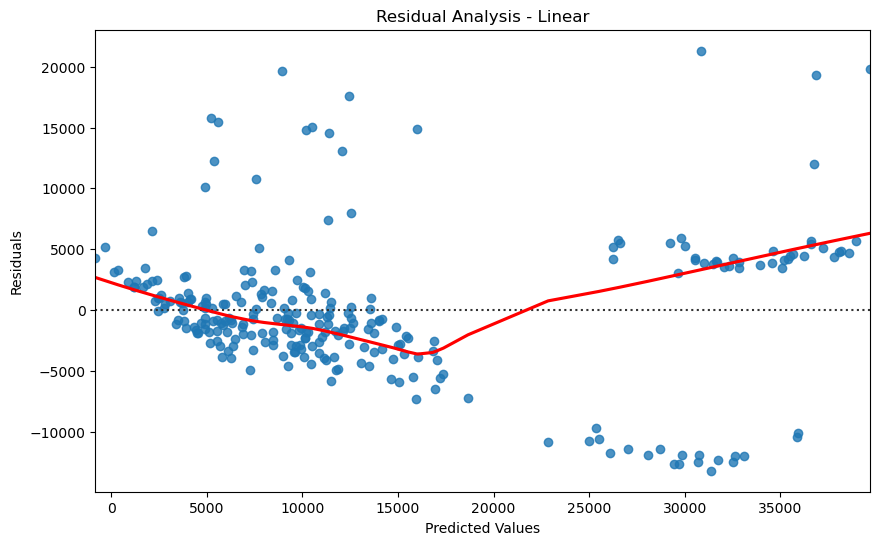

In [525]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred_lr, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Analysis - Linear")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
#plt.savefig('ResidualsLinear.png') 
#plt.clf() 

### Residual Plot for Ridge Regression

This visualization analyzes the residuals (errors) from the Ridge Regression model:

1. **Creating the Residual Plot**:
   - `sns.residplot(x=y_pred, y=y_test - y_pred_ridge, lowess=True, line_kws={'color': 'blue'})`: A residual plot is created with the predicted values (`y_pred`) on the x-axis and the residuals (the difference between the true values `y_test` and predicted values `y_pred_ridge`) on the y-axis.
     - The `lowess=True` parameter fits a locally weighted scatterplot smoothing line to the residuals.
     - The blue line (`line_kws={'color': 'blue'}`) helps visualize any patterns in the residuals.

2. **Adding Labels and Title**:
   - `plt.title("Residual Analysis - Ridge")`: Sets the title of the plot.
   - `plt.xlabel("Predicted Values")`: Labels the x-axis as "Predicted Values".
   - `plt.ylabel("Residuals")`: Labels the y-axis as "Residuals".

This residual plot helps assess the performance of the Ridge regression model. As with Linear regression, residuals should be randomly scattered around zero. Any patterns or trends in the residuals may suggest that the model is not fully capturing the data's structure.


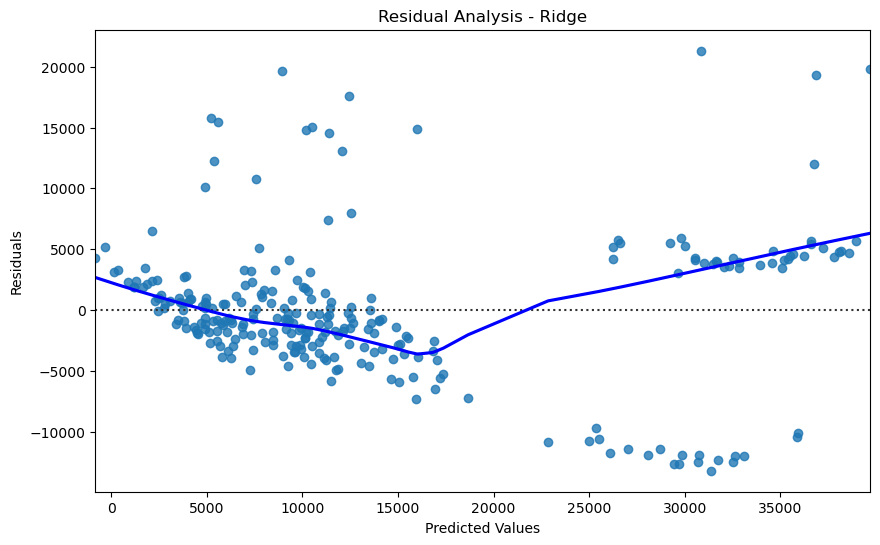

In [527]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred_ridge, lowess=True, line_kws={'color': 'blue'})
plt.title("Residual Analysis - Ridge")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
#plt.savefig('ResidualsRidge.png') 
#plt.clf() 

### Residual Plot for Lasso Regression

This visualization analyzes the residuals (errors) from the Lasso Regression model:

1. **Creating the Residual Plot**:
   - `sns.residplot(x=y_pred, y=y_test - y_pred_lasso, lowess=True, line_kws={'color': 'green'})`: A residual plot is created with the predicted values (`y_pred`) on the x-axis and the residuals (the difference between the true values `y_test` and predicted values `y_pred_lasso`) on the y-axis.
     - The `lowess=True` parameter fits a locally weighted scatterplot smoothing line to the residuals.
     - The green line (`line_kws={'color': 'green'}`) helps visualize any patterns in the residuals.

2. **Adding Labels and Title**:
   - `plt.title("Residual Analysis - Lasso")`: Sets the title of the plot.
   - `plt.xlabel("Predicted Values")`: Labels the x-axis as "Predicted Values".
   - `plt.ylabel("Residuals")`: Labels the y-axis as "Residuals".

This residual plot helps assess the performance of the Lasso regression model. As with the other models, ideally, the residuals should be randomly scattered around zero, indicating that the model is fitting the data well. Any visible patterns might suggest the model is not fully capturing the underlying relationships in the data.


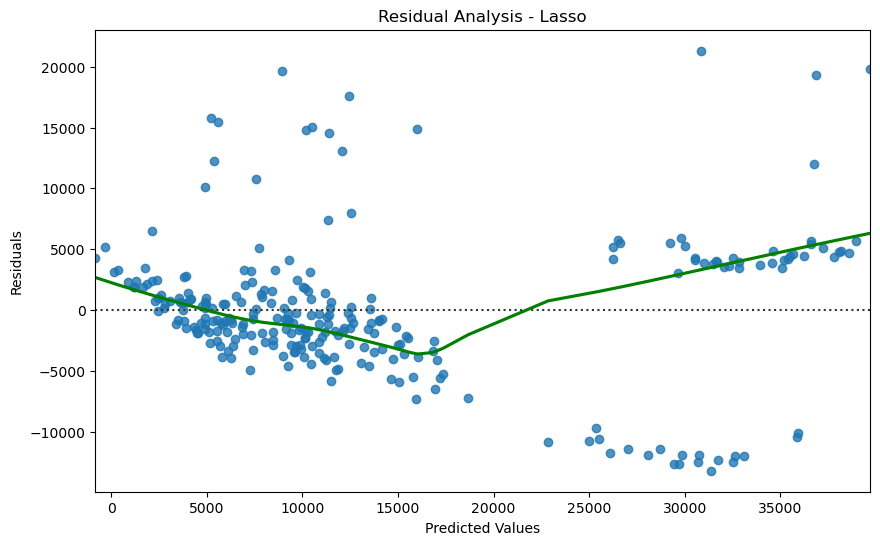

In [529]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred_lasso, lowess=True, line_kws={'color': 'green'})
plt.title("Residual Analysis - Lasso")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
#plt.savefig('ResidualsLasso.png') 
#plt.clf() 

### Actual vs Predicted Plot for Linear Regression

This plot compares the actual values of medical charges with the predicted values from the Linear Regression model:

1. **Creating the Scatter Plot**:
   - `sns.scatterplot(x=y_test, y=y_pred_lr)`: A scatter plot is created with the actual values (`y_test`) on the x-axis and the predicted values (`y_pred_lr`) on the y-axis.

2. **Adding a Reference Line**:
   - `plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')`: A red dashed line is added to the plot, which represents the ideal scenario where the predicted values exactly match the actual values. This line has a slope of 1 and intercept of 0, indicating perfect prediction.

3. **Adding Labels and Title**:
   - `plt.xlabel("Actual Charges")`: Labels the x-axis as "Actual Charges".
   - `plt.ylabel("Predicted Charges")`: Labels the y-axis as "Predicted Charges".
   - `plt.title("Actual vs Predicted Medical Charges - Linear")`: Sets the title of the plot.

This plot allows us to visually assess how well the Linear Regression model is performing. If the model is perfect, the points should lie along the red dashed line. Deviations from this line indicate errors in the model’s predictions.


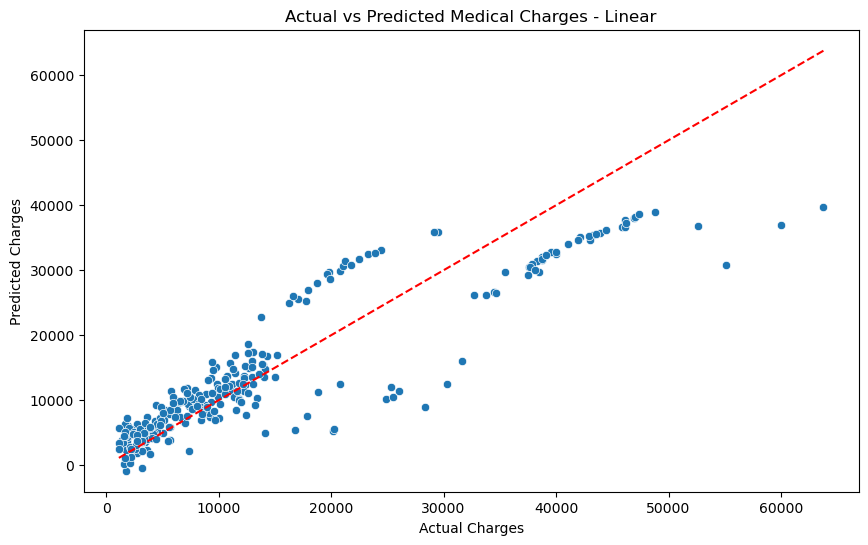

In [531]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges - Linear")
plt.show()
#plt.savefig('ActualvsPredictedLinear.png') 
#plt.clf() 

### Actual vs Predicted Plot for Ridge Regression

This plot compares the actual values of medical charges with the predicted values from the Ridge Regression model:

1. **Creating the Scatter Plot**:
   - `sns.scatterplot(x=y_test, y=y_pred_ridge)`: A scatter plot is created with the actual values (`y_test`) on the x-axis and the predicted values (`y_pred_ridge`) on the y-axis.

2. **Adding a Reference Line**:
   - `plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')`: A red dashed line is added to the plot, which represents the ideal scenario where the predicted values exactly match the actual values. This line has a slope of 1 and intercept of 0, indicating perfect prediction.

3. **Adding Labels and Title**:
   - `plt.xlabel("Actual Charges")`: Labels the x-axis as "Actual Charges".
   - `plt.ylabel("Predicted Charges")`: Labels the y-axis as "Predicted Charges".
   - `plt.title("Actual vs Predicted Medical Charges - Ridge")`: Sets the title of the plot.

This plot helps visualize how well the Ridge Regression model is predicting medical charges. A perfect model would have points lying along the red dashed line, while deviations indicate the errors in the model’s predictions.


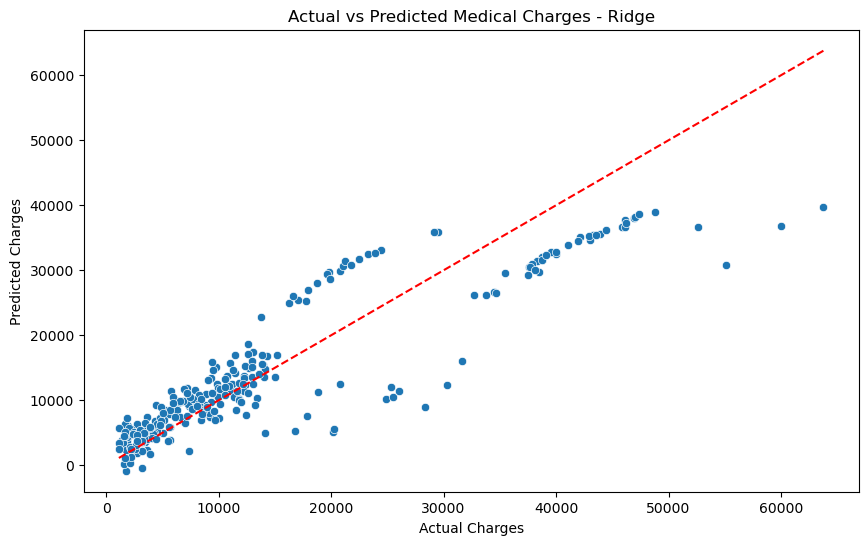

In [533]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges - Ridge")
plt.show()
#plt.savefig('ActualvsPredictedRidge.png') 
#plt.clf() 

### Actual vs Predicted Plot for Lasso Regression

This plot compares the actual values of medical charges with the predicted values from the Lasso Regression model:

1. **Creating the Scatter Plot**:
   - `sns.scatterplot(x=y_test, y=y_pred_lasso)`: A scatter plot is created with the actual values (`y_test`) on the x-axis and the predicted values (`y_pred_lasso`) on the y-axis.

2. **Adding a Reference Line**:
   - `plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')`: A red dashed line is added to the plot, which represents the ideal scenario where the predicted values exactly match the actual values. This line has a slope of 1 and intercept of 0, indicating perfect prediction.

3. **Adding Labels and Title**:
   - `plt.xlabel("Actual Charges")`: Labels the x-axis as "Actual Charges".
   - `plt.ylabel("Predicted Charges")`: Labels the y-axis as "Predicted Charges".
   - `plt.title("Actual vs Predicted Medical Charges - Lasso")`: Sets the title of the plot.

This plot helps visualize how well the Lasso Regression model is performing. A perfect model would have all points lying along the red dashed line, indicating that the predicted values are equal to the actual values. Deviation from this line shows the prediction errors.


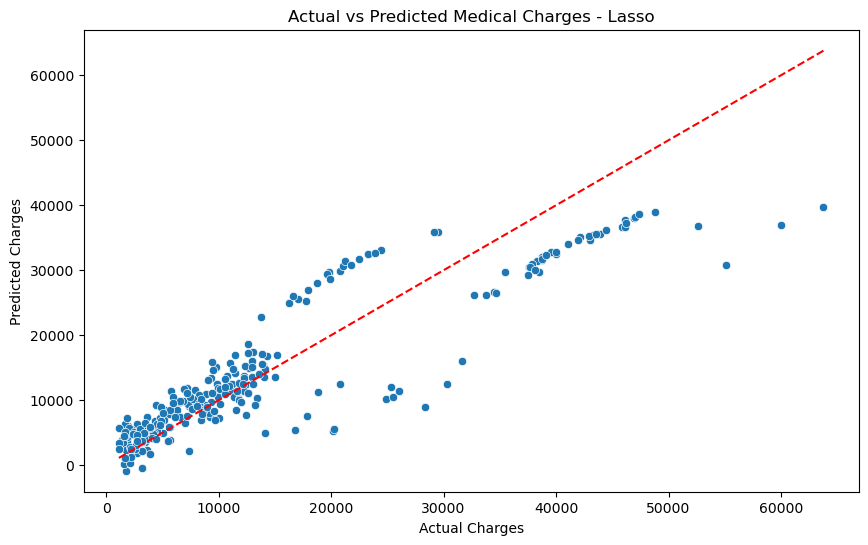

In [535]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges - Lasso")
plt.show()
#plt.savefig('ActualvsPredictedLasso.png') 
#plt.clf() 

### **Retraining with Ridge Regression (With Regularization)**

Ridge regression is used to apply regularization, which helps prevent overfitting by penalizing large coefficients. The `alpha` parameter controls the regularization strength.

1. **Ridge Regression**:
   - `ridge_model = Ridge(alpha=10)`: Creates a Ridge regression model with a specified regularization strength (`alpha=10`).
   - `ridge_model.fit(X, y)`: Fits the Ridge regression model to the data.

2. **Model Coefficients**:
   - `print("Ridge Model Coefficients:", ridge_model.coef_)`: Prints the coefficients of the Ridge model.

3. **Evaluating Lasso Regression Model Performance**:
   - `r2_score(y, y_pred_lasso)`: Calculates the **R²** for the Lasso regression model, measuring how well it explains the variance in the target variable.
   - `mean_absolute_error(y, y_pred_lasso)`: Computes the **Mean Absolute Error (MAE)**, which shows the average magnitude of errors in the Lasso model's predictions.
   - `root_mean_squared_error(y, y_pred_lasso)`: Calculates the **Root Mean Squared Error (RMSE)** for the Lasso model, indicating the average prediction error in the same units as the target variable.

In [586]:
# Retrain with Ridge Regression
ridge_model = Ridge(alpha=10)  # You can adjust alpha as needed (higher = more regularization)
ridge_model.fit(X, y)

# Print the model coefficients
print("Ridge Model Coefficients:", ridge_model.coef_)

# Evaluation metrics for Ridge model
y_pred_ridge = ridge_model.predict(X)
print(f"Ridge R²: {r2_score(y, y_pred_ridge):.3f}")
print(f"Ridge MAE: {mean_absolute_error(y, y_pred_ridge):.3f}")
print(f"Ridge RMSE: ${root_mean_squared_error(y, y_pred_ridge):,.2f}")


Ridge Model Coefficients: [  256.97324922   322.26533536   473.46601557 22764.67216161]
Ridge R²: 0.748
Ridge MAE: 4261.844
Ridge RMSE: $6,073.32


### **Retraining with Lasso Regression (With Regularization)**

Lasso regression, like Ridge, applies regularization but also performs feature selection by shrinking some coefficients to zero.

1. **Lasso Regression**:
   - `lasso_model = Lasso(alpha=0.1)`: Creates a Lasso regression model with a specified regularization strength (`alpha=0.1`).
   - `lasso_model.fit(X, y)`: Fits the Lasso regression model to the data.

2. **Model Coefficients**:
   - `print("Lasso Model Coefficients:", lasso_model.coef_)`: Prints the coefficients of the Lasso model.

3. **Evaluating Ridge Regression Model Performance**:
   - `r2_score(y, y_pred_ridge)`: Calculates the **R²** for the Ridge regression model, measuring how well it explains the variance in the target variable.
   - `mean_absolute_error(y, y_pred_ridge)`: Computes the **Mean Absolute Error (MAE)**, which shows the average magnitude of errors in the Ridge model's predictions.
   - `root_mean_squared_error(y, y_pred_ridge)`: Calculates the **Root Mean Squared Error (RMSE)** for the Ridge model, indicating the average prediction error in the same units as the target variable.


In [598]:
# Retrain with Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Adjust alpha to change regularization strength
lasso_model.fit(X, y)

# Print the model coefficients
print("Lasso Model Coefficients:", lasso_model.coef_)

# Evaluation metrics for Lasso model
y_pred_lasso = lasso_model.predict(X)
print(f"Lasso R²: {r2_score(y, y_pred_lasso):.3f}")
print(f"Lasso MAE: {mean_absolute_error(y, y_pred_lasso):.3f}")
print(f"Lasso RMSE: ${root_mean_squared_error(y, y_pred_lasso):,.2f}")


Lasso Model Coefficients: [  257.77221173   321.86858383   472.90814616 23809.78651473]
Lasso R²: 0.750
Lasso MAE: 4181.377
Lasso RMSE: $6,058.64


### **Hyperparameter Tuning for Ridge and Lasso Models (Optional)**

Grid search is used to tune the `alpha` parameter of Ridge and Lasso models. The `alpha` parameter controls the strength of regularization, and tuning it can help find the best model.

1. **Grid Search for Ridge**:
   - `ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}`: Defines a grid of `alpha` values to test for Ridge regression.
   - `ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5)`: Performs a 5-fold cross-validation to find the best `alpha` for Ridge regression.

2. **Grid Search for Lasso**:
   - `lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}`: Defines a grid of `alpha` values to test for Lasso regression.
   - `lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5)`: Performs a 5-fold cross-validation to find the best `alpha` for Lasso regression.


In [ ]:
# Hyperparameter tuning for Ridge
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5)
ridge_grid_search.fit(X, y)

print("Best alpha for Ridge:", ridge_grid_search.best_params_)

# Hyperparameter tuning for Lasso
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5)
lasso_grid_search.fit(X, y)

print("Best alpha for Lasso:", lasso_grid_search.best_params_)


### **Retraining with Best Hyperparameters**

Once the best `alpha` values are found through grid search, the models are retrained with those optimal values.

1. **Retraining Ridge with Best `alpha`**:
   - `best_ridge_model = Ridge(alpha=ridge_grid_search.best_params_['alpha'])`: Retrains the Ridge model using the best `alpha` value from grid search.
   - `best_ridge_model.fit(X, y)`: Fits the Ridge model with the best `alpha` value.

2. **Retraining Lasso with Best `alpha`**:
   - `best_lasso_model = Lasso(alpha=lasso_grid_search.best_params_['alpha'])`: Retrains the Lasso model using the best `alpha` value from grid search.
   - `best_lasso_model.fit(X, y)`: Fits the Lasso model with the best `alpha` value.

3. **Updated Coefficients**:
   - `print("Best Ridge Model Coefficients:", best_ridge_model.coef_)`: Prints the updated coefficients for the best Ridge model.
   - `print("Best Lasso Model Coefficients:", best_lasso_model.coef_)`: Prints the updated coefficients for the best Lasso model.


In [596]:
# Retrain Ridge with best alpha
best_ridge_model = Ridge(alpha=ridge_grid_search.best_params_['alpha'])
best_ridge_model.fit(X_train_scaled, y_train)  # Use the training set

# Retrain Lasso with best alpha
best_lasso_model = Lasso(alpha=lasso_grid_search.best_params_['alpha'])
best_lasso_model.fit(X_train_scaled, y_train)  # Use the training set

# Make predictions for both models on the test set
y_pred_ridge = best_ridge_model.predict(X_test_scaled)
y_pred_lasso = best_lasso_model.predict(X_test_scaled)
# Print the evaluation metrics for Ridge
print(f"Ridge R²: {r2_score(y_test, y_pred_ridge):.3f}")
print(f"Ridge MAE: {mean_absolute_error(y_test, y_pred_ridge):.3f}")
print(f"Ridge RMSE: ${root_mean_squared_error(y_test, y_pred_ridge):,.2f}")
print()
# Print the evaluation metrics for Lasso
print(f"Lasso R²: {r2_score(y_test, y_pred_lasso):.3f}")
print(f"Lasso MAE: {mean_absolute_error(y_test, y_pred_lasso):.3f}")
print(f"Lasso RMSE: ${root_mean_squared_error(y_test, y_pred_lasso):,.2f}")
print()
# Print the new coefficients for both models
print("Best Ridge Model Coefficients:", best_ridge_model.coef_)
print("Best Lasso Model Coefficients:", best_lasso_model.coef_)

Ridge R²: 0.805
Ridge MAE: 4198.850
Ridge RMSE: $5,993.15

Lasso R²: 0.804
Lasso MAE: 4199.325
Lasso RMSE: $5,996.82

Best Ridge Model Coefficients: [3486.35498489 1846.4168621   642.40206059 9219.3563053 ]
Best Lasso Model Coefficients: [3477.94303527 1837.4488761   633.13097533 9209.87211553]
